In [25]:
!pip -q install seaborn
import seaborn as sns


import sys, pandas as pd, seaborn as sns, matplotlib
print(sys.version)
print(pd.__version__, sns.__version__, matplotlib.__version__)

from pathlib import Path
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ROOT = Path('/content/drive/MyDrive/ID-UT1-iris')
except Exception:
    ROOT = Path.cwd() / 'ID-UT1-iris'

PLOTS_DIR = ROOT / 'results' / 'visualizaciones'
PERF_DIR = ROOT / 'results' / 'perfiles'
REPORT_DIR = ROOT / 'results' / 'reportes'
for d in (PLOTS_DIR, PERF_DIR, REPORT_DIR):
    d.mkdir(parents=True, exist_ok=True)
print('Outputs →', ROOT)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2.2.2 0.13.2 3.10.0
Outputs → /content/ID-UT1-iris


# Pregunta de negocio

1. ¿Cuál es la especie con pétalo más largo?
2. Hay alguna relacion con el largo del sepal y el del petalo
3. ¿Cuál es la especia con promedio de sepal más ancho?

In [26]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df1 = pd.read_csv(url)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
import seaborn as sns
df2 = sns.load_dataset('iris')
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris(as_frame=True)
df3 = data.frame
df3.rename(columns={'target': 'species'}, inplace=True)
df3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
from google.colab import files
import io, pandas as pd
uploaded = files.upload()
df4 = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
df4.head()

Saving Iris.csv to Iris (2).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
if df1.equals(df2):
  print("Las bases 1 y 2 son iguales")
else:
  print("Las bases 1 y 2 son distintas")

if df3.equals(df2):
  print("Las bases 2 y 3 son iguales")
else:
  print("Las bases 2 y 3 son distintas")

if df3.equals(df4):
  print("Las bases 4 y 3 son iguales")
else:
  print("Las bases 4 y 3 son distintas")

if df1.equals(df4):
  print("Las bases 1 y 4 son iguales")
else:
  print("Las bases 1 y 4 son distintas")




Las bases 1 y 2 son iguales
Las bases 2 y 3 son distintas
Las bases 4 y 3 son distintas
Las bases 1 y 4 son distintas


In [31]:
import pandas as pd
df1.shape, df1.dtypes, df1.isna().sum()
display(df1.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
import pandas as pd
df2.shape, df2.dtypes, df2.isna().sum()
display(df2.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
import pandas as pd
df3.shape, df3.dtypes, df3.isna().sum()
display(df3.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [34]:
import pandas as pd
df4.shape, df4.dtypes, df4.isna().sum()
display(df4.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from pandas.api.types import is_string_dtype

if is_string_dtype(df1['species']):
    df1['species'] = df1['species'].astype('category')


desc = df1.describe()
corr = df1.select_dtypes('number').corr()
print(desc); print(corr)


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


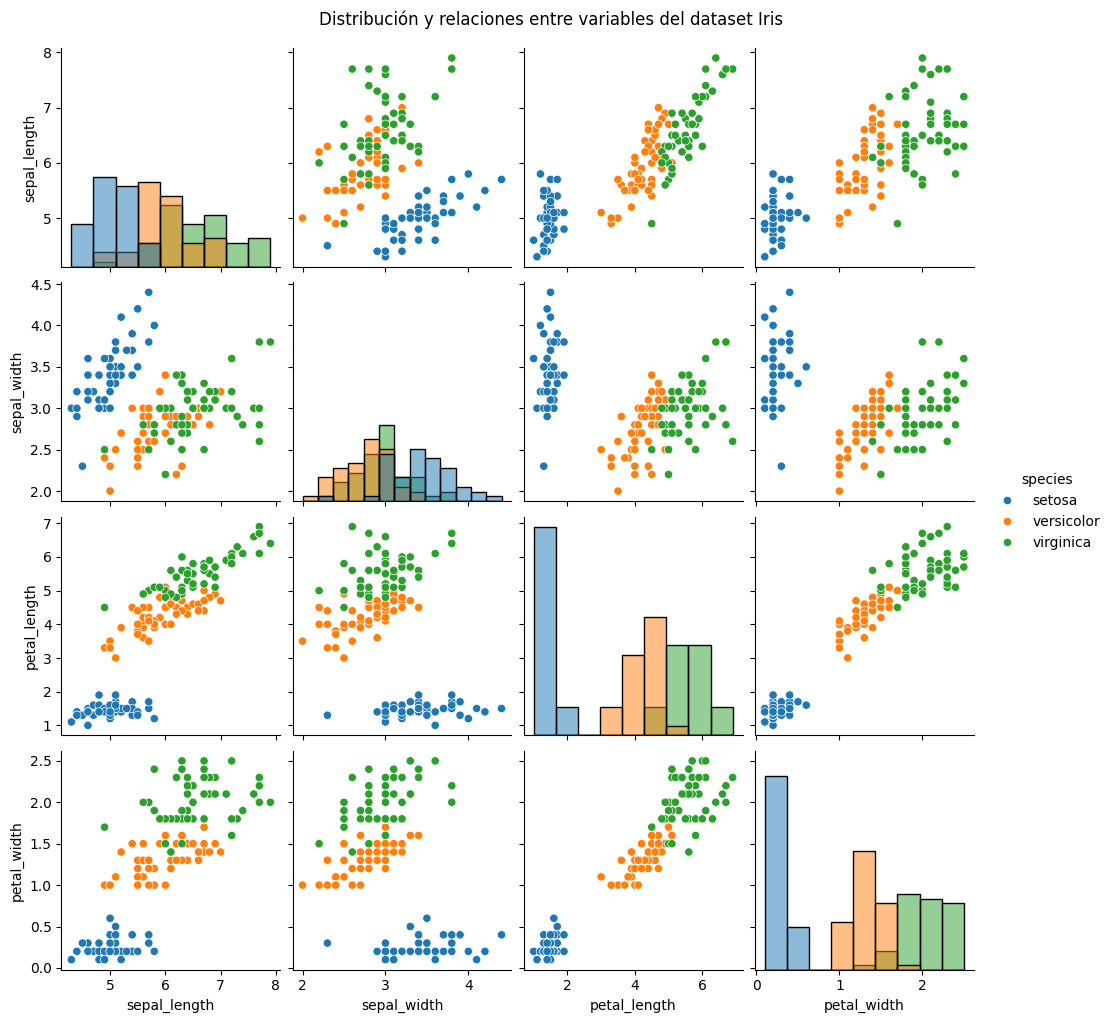

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pares de relaciones entre variables
sns.pairplot(df1, hue="species", diag_kind="hist")
plt.suptitle("Distribución y relaciones entre variables del dataset Iris", y=1.02)
plt.show()


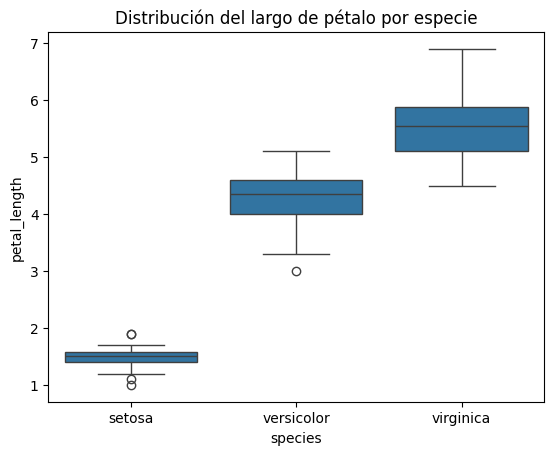

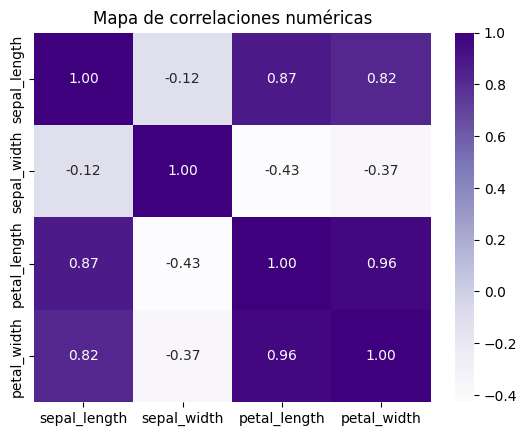

In [37]:
# Boxplot de largo de pétalo por especie
sns.boxplot(x="species", y="petal_length", data=df1)
plt.title("Distribución del largo de pétalo por especie")
plt.show()

# Heatmap de correlaciones
sns.heatmap(df1.select_dtypes('number').corr(), annot=True, cmap="Purples", fmt=".2f")
plt.title("Mapa de correlaciones numéricas")
plt.show()
